
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

First I will load the train and test set as well as modules I will be using to visualize the data. 

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")



First, the data set is printed to look at the different features present in the datasets

In [0]:
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]


In [0]:
print(trainset[trainset.label == 1].label.count())
print(trainset[trainset.label == 0].label.count())

901
1099


There are 901 timepoints captured where the subjects eyes were closes (label 1) and 1099 timepoints where the subjects eyes were open (label2)

The label column from the trainset and the index column from the testset should be removed. The Label column of the training set should be saved in a variable 


In [0]:
train_label = trainset.pop('label')
testset.pop('index')
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4299.49  3997.44  4277.95  4116.92  ...  4211.79  4278.97  4600.00  4369.23
1  4302.05  3985.64  4261.03  4129.74  ...  4195.90  4283.08  4607.18  4358.46
2  4321.03  4015.90  4265.13  4122.56  ...  4155.38  4286.15  4608.21  4371.79
3  4408.21  4104.10  4380.00  4232.31  ...  4319.49  4388.21  4715.90  4464.10
4  4347.18  3975.38  4266.67  4102.56  ...  4248.21  4313.33  4664.10  4411.79

[5 rows x 14 columns]
       AF3       F7       F3      FC5  ...      FC6       F4       F8      AF4
0  4296.41  4040.51  4253.33  4124.10  ...  4197.44  4268.72  4598.46  4342.56
1  4291.28  3994.36  4247.18  4102.56  ...  4190.77  4260.51  4593.33  4337.95
2  4299.49  4019.49  4269.74  4116.41  ...  4202.56  4280.51  4596.92  4350.26
3  4280.00  4004.62  4263.59  4120.51  ...  4192.82  4271.79  4608.72  4344.10
4  4317.44  3968.72  4260.51  4101.54  ...  4199.49  4282.05  4592.31  4372.82

[5 rows x 14 columns]


Now in both the train and testset the only columns that are present are features. 



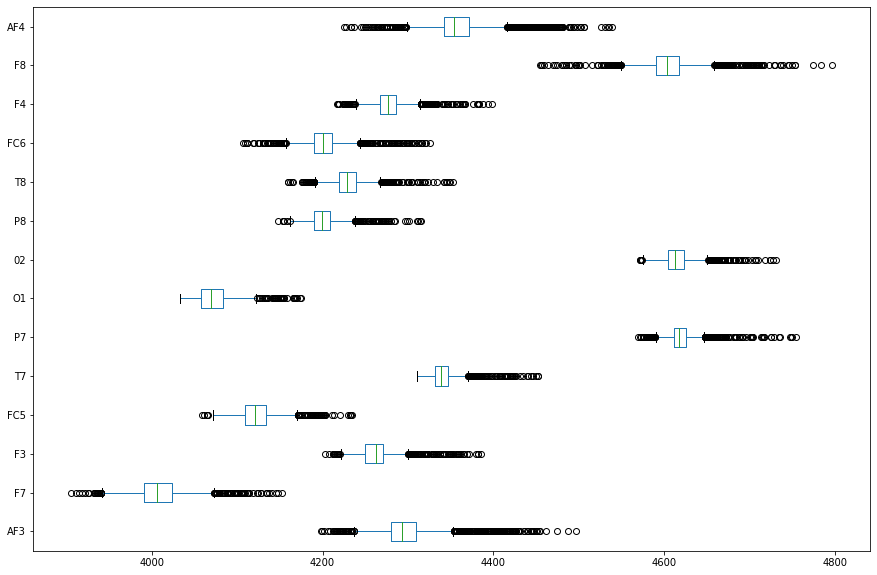

In [0]:

plt.figure(figsize = (15,10))
trainset.boxplot(vert = False, grid = False , )

The data is not centered around 0 , the next step is to center the data around 0.
all features need to have the same scale

Standardization (or **Z-score normalization**) scales the features such that they'll have the properties of a standard normal distribution ($\mu = 0$ and $\sigma = 1$):

\begin{equation} x_{norm} = \frac{x - \mu}{\sigma}.\end{equation} 

Standardizing the features is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(trainset)

trainset_scaled = scaler.transform(trainset)

testset_scaled = scaler.transform(testset)


trainset_scaled = pd.DataFrame(trainset_scaled ,columns= trainset.columns )
testset_scaled = pd.DataFrame(testset_scaled ,columns= testset.columns )




In [0]:
print(trainset_scaled.head())
print(testset_scaled.head())

        AF3        F7        F3  ...        F4        F8       AF4
0 -0.018351 -0.396476  0.677912  ...  0.026714 -0.156365  0.252992
1  0.052070 -0.791842 -0.136210  ...  0.235973  0.060820 -0.037576
2  0.574178  0.222036  0.061066  ...  0.392280  0.091976  0.322059
3  2.972354  3.177226  5.588146  ...  5.588622  3.349453  2.812530
4  1.293521 -1.135609  0.135164  ...  1.776139  1.782573  1.401236

[5 rows x 14 columns]
        AF3        F7        F3  ...        F4        F8       AF4
0 -0.103077  1.046608 -0.506702  ... -0.495161 -0.202948 -0.466549
1 -0.244195 -0.499673 -0.802616  ... -0.913170 -0.358124 -0.590924
2 -0.018351  0.342321  0.282880  ...  0.105122 -0.249531 -0.258808
3 -0.554489 -0.155906 -0.013033  ... -0.338853  0.107403 -0.425001
4  0.475423 -1.358756 -0.161230  ...  0.183531 -0.388978  0.349848

[5 rows x 14 columns]


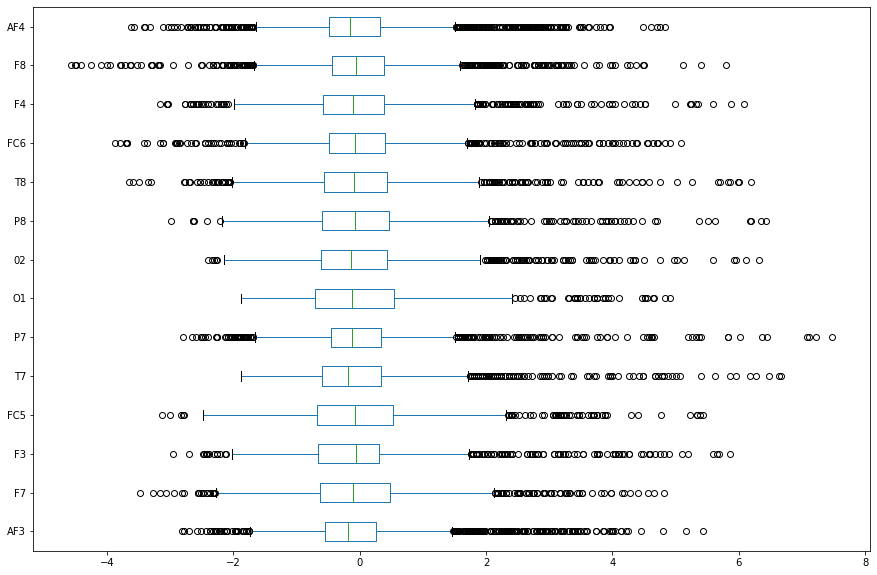

In [0]:
plt.figure(figsize = (15,10))
trainset_scaled.boxplot(vert = False, grid = False )

this data set requires a classification model since it is a classification task. 

The first model that is used is a support vector machine